In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def poisson_random_process(lmbda, total_time):
    """
    Generate a Poisson random process.
    
    Parameters:
        lmbda (float): The parameter lambda of the Poisson distribution.
        total_time (float): The total time for the process.
    
    Returns:
        numpy.ndarray: An array of timestamps when events occur.
    """
    num_events = np.random.poisson(lmbda * total_time)
    event_times = np.cumsum(np.random.exponential(1 / lmbda, num_events))
    event_times = event_times[event_times < total_time]
    return event_times



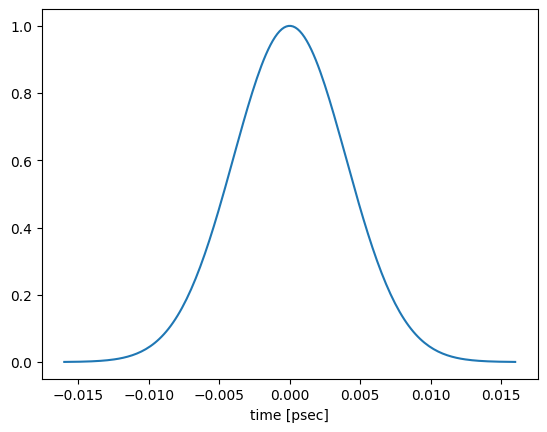

In [3]:
## HOM for partially distinguishable photons
hom_coincidence = lambda x, dw: np.exp(-(x*dw) **2/2 ) 
dw = 250 # GHz
x = np.linspace(-1,1,200)*4/dw
plt.plot(x, hom_coincidence(x,dw))
plt.xlabel("time [psec]")
plt.show()

## sanity checks

In [27]:
gen_rate = 1 # Parameter lambda in Hz
total_time = 1e3  # Total time in sec for the process
dw = 1e2

reset_time = 1

np.random.seed(124)

# print(i_r, end="\r")
s1 = poisson_random_process(gen_rate, total_time)
s2 = poisson_random_process(gen_rate, total_time)

num_trials = min(s1.shape[0],s2.shape[0])
# num_trials
all_events = np.concatenate((s1,s2))
events_inds = all_events.argsort()
all_events = all_events[events_inds]
emissions = np.zeros(events_inds.shape[0], dtype=np.int32)
emissions[np.argwhere(events_inds>=s1.shape[0])] = 1

succ_prob = 0
qu_reset = [False, False]
qu_avaialble_time = [0,0]
i_trial = 0
while i_trial < 100:#len(emissions)-1:
    if all_events[i_trial] >= qu_avaialble_time[emissions[i_trial]]:
        qu_reset[emissions[i_trial]] = False
        qu_avaialble_time[emissions[i_trial]] = 0
    print(i_trial, qu_reset)
    print(emissions[i_trial], qu_avaialble_time)
    
    if emissions[i_trial+1]== 1- emissions[i_trial]:
        if all_events[i_trial+1] >= qu_avaialble_time[emissions[i_trial+1]]:
            qu_reset[emissions[i_trial+1]] = False
            qu_avaialble_time[emissions[i_trial+1]] = 0

        if (not qu_reset[0])*(not qu_reset[1]):
            dt = all_events[i_trial+1]-all_events[i_trial]
            prob = hom_coincidence(dt,dw) # 0.5 for BSM post selection
            print(f"prob: {prob}")
            if np.random.rand()< prob: # accept with probability p
        #     ## check if BSM can be performed
                ## BSM measurement
                succ_prob = 1
                break
            # i_trial += 2
            
    # ## shift timer
    # new_avail_time = all_events[i_trial]+reset_time
    if  all_events[i_trial] >= qu_avaialble_time[emissions[i_trial]]:
        qu_reset[emissions[i_trial]] = True
        qu_avaialble_time[emissions[i_trial]] = all_events[i_trial]+reset_time
        
    i_trial += 1
    # print(qu_reset, qu_a
print(succ_prob)

0 [False, False]
0 [0, 0]
prob: 0.0
1 [True, False]
1 [1.8493649140782884, 0]
2 [True, True]
0 [1.8493649140782884, 2.3744986960893595]
3 [False, True]
0 [0, 2.3744986960893595]
4 [True, True]
0 [2.947954198193826, 2.3744986960893595]
5 [True, False]
1 [2.947954198193826, 0]
6 [True, True]
1 [2.947954198193826, 4.113802339550154]
7 [False, True]
0 [0, 4.113802339550154]
8 [True, True]
1 [4.370651824579742, 4.113802339550154]
9 [True, True]
0 [4.370651824579742, 4.113802339550154]
10 [True, True]
0 [4.370651824579742, 4.113802339550154]
11 [True, False]
1 [4.370651824579742, 0]
12 [True, True]
1 [4.370651824579742, 5.359675021785615]
13 [True, False]
1 [4.370651824579742, 0]
prob: 9.266667201049608e-152
14 [False, True]
0 [0, 6.454688350595846]
15 [True, True]
1 [6.7184179508857635, 6.454688350595846]
16 [True, False]
1 [6.7184179508857635, 0]
17 [True, True]
0 [6.7184179508857635, 7.587422769001142]
18 [False, True]
0 [0, 7.587422769001142]
19 [True, True]
1 [7.763633775666479, 7.58742

In [30]:
print(emissions[30:100])
print(all_events[30:100])

[1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1]
[13.14784124 14.0280308  14.91189016 15.10291962 15.27933675 16.35617778
 16.35831701 17.3328552  17.63412477 18.44496976 18.96414091 19.10088587
 19.1170076  19.6540271  19.97915669 20.72680493 21.79900807 22.82388525
 23.51664763 25.06127313 25.38249692 25.95341737 26.29343334 26.70787881
 26.7708829  26.77660354 27.27170896 27.96454642 30.28920034 30.87040396
 31.13301121 31.2351317  31.51716133 32.69079138 32.91072995 34.10693394
 34.67990946 34.68209251 34.69266056 35.10475201 35.82632924 36.12197646
 36.21891947 36.90855053 37.32247652 38.52588785 39.15507018 39.50307792
 39.62097766 39.69022128 40.35449242 41.06415114 41.55891088 41.78267485
 42.32626111 42.38859321 42.93023356 43.24630661 44.60827016 44.82609652
 45.70449123 46.11277947 47.22180487 47.30278957 47.51171352 47.56144142
 47.86488845 48.5500292  48.74465721 49.12276969]


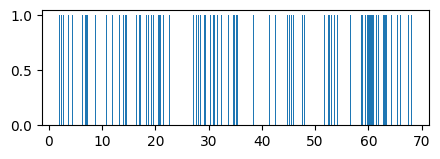

<BarContainer object of 97 artists>

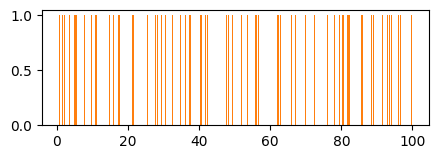

In [68]:
plt.figure(figsize=(5,1.5))
plt.bar(s1*1e6,1,width=2e-1)
plt.show()
plt.figure(figsize=(5,1.5))
plt.bar(s2*1e6,1,width=2e-1,color="C1")


In [6]:
## sanity check

s1 = np.array([1,3,10,14])
s2 = np.array([2,5,7,8,12])
all_events = np.concatenate((s1,s2))
events_inds = all_events.argsort()
all_events = all_events[events_inds]
emissions = np.zeros(events_inds.shape[0])
emissions[np.argwhere(events_inds>=s1.shape[0])] = 1

print(all_events)
print(emissions)


[ 1  2  3  5  7  8 10 12 14]
[0. 1. 0. 1. 1. 1. 0. 1. 0.]


In [37]:
gen_rate = 1e6 # Parameter lambda in Hz
total_time_list = np.logspace(-5,-2,8)  # Total time in sec for the process
dw = 10**9

reset_time_list = [1e-7,1e-6]

Nrep = 1000
succ_prob = np.zeros((len(total_time_list),len(reset_time_list), Nrep))
for i_t, total_time in enumerate(total_time_list):
    tic = time.time()
    for i_reset, reset_time in enumerate(reset_time_list):
        for i_r in range(Nrep):
        # print(i_r, end="\r")
            s1 = poisson_random_process(gen_rate, total_time)
            s2 = poisson_random_process(gen_rate, total_time)

            num_trials = min(s1.shape[0],s2.shape[0])
            # num_trials
            all_events = np.concatenate((s1,s2))
            events_inds = all_events.argsort()
            all_events = all_events[events_inds]
            emissions = np.zeros(events_inds.shape[0], dtype=np.int32)
            emissions[np.argwhere(events_inds>=s1.shape[0])] = 1

            # time_diff = []

            qu_reset = [False, False]
            qu_avaialble_time = [0,0]
            i_trial = 0
            while i_trial < len(emissions)-1:
                if all_events[i_trial] >= qu_avaialble_time[emissions[i_trial]]:
                    qu_reset[emissions[i_trial]] = False
                    qu_avaialble_time[emissions[i_trial]] = 0
                
                if emissions[i_trial+1]== 1- emissions[i_trial]:
                    if all_events[i_trial+1] >= qu_avaialble_time[emissions[i_trial+1]]:
                        qu_reset[emissions[i_trial+1]] = False
                        qu_avaialble_time[emissions[i_trial+1]] = 0

                    if (not qu_reset[0])*(not qu_reset[1]):
                        dt = all_events[i_trial+1]-all_events[i_trial]
                        prob = 0.5* hom_coincidence(dt,dw) # 0.5 for BSM post selection
                        if np.random.rand()< prob: # accept with probability p
                    #     ## check if BSM can be performed
                            ## BSM measurement
                            succ_prob[i_t,i_reset,i_r] = 1
                            break
                        # i_trial += 2
                        
                # ## shift timer
                # new_avail_time = all_events[i_trial]+reset_time
                if  all_events[i_trial] >= qu_avaialble_time[emissions[i_trial]]:
                    qu_reset[emissions[i_trial]] = True
                    qu_avaialble_time[emissions[i_trial]] = all_events[i_trial]+reset_time
                    
                i_trial += 1

                # if emissions[i_trial+1]== 1- emissions[i_trial]:
                #     dt = all_events[i_trial+1]-all_events[i_trial]
                #     prob = 0.5* hom_coincidence(dt,dw) # 0.5 for BSM post selection
                #     if np.random.rand()< prob: # accept with probability p
                #     #     ## check if BSM can be performed
                #         if (not qu_reset[0])*(not qu_reset[1]):
                #             ## BSM measurement
                #             succ_prob[i_t,i_reset,i_r] = 1
                #             break
                #         # i_trial += 2
                        
                # # ## shift timer
                # # new_avail_time = all_events[i_trial]+reset_time
                # if  all_events[i_trial] >= qu_avaialble_time[emissions[i_trial]]:
                #     qu_reset[emissions[i_trial]] = True
                #     qu_avaialble_time[emissions[i_trial]] = all_events[i_trial]+reset_time
                    
                # i_trial += 1
                # if all_events[i_trial] >= qu_avaialble_time[emissions[i_trial]]:
                #     qu_reset[emissions[i_trial]] = False
                #     qu_avaialble_time[emissions[i_trial]] = 0
                # # print(qu_reset, qu_avaialble_time)

    toc = time.time()
    print(f"({i_t}), elapsed time {toc-tic} sec")



(0), elapsed time 0.2963430881500244 sec
(1), elapsed time 0.5682923793792725 sec
(2), elapsed time 1.4117405414581299 sec
(3), elapsed time 3.7375104427337646 sec
(4), elapsed time 9.237976312637329 sec
(5), elapsed time 19.299910306930542 sec
(6), elapsed time 32.05641961097717 sec
(7), elapsed time 41.698450326919556 sec


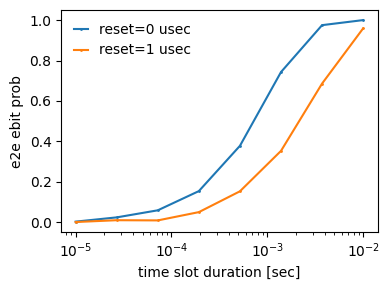

In [38]:
plt.figure(figsize=(4,3))
for i_reset, reset_time in enumerate(reset_time_list):
    plt.plot(total_time_list, (succ_prob[:,i_reset,:]).mean(axis=-1), ".-",markersize=2, color = f"C{i_reset}", label=fr"reset={reset_time*1e6:.0f} usec")
    # plt.plot(total_time_list, succ_prob[:,i_reset,:], ".",markersize=2, color = f"C{i_reset}")

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"time slot duration [sec]")
plt.ylabel("e2e ebit prob")
# plt.ylim([1e1,1e6])
plt.legend(frameon=False, handlelength=1)
# plt.grid()
plt.tight_layout()
# plt.savefig("figures/rate_vs_delay_w_loss_baseline.pdf")
# plt.savefig("figures/rate_vs_delay_w_loss_dense.pdf")
# plt.savefig("figures/rate_vs_delay_baseline.pdf")
plt.show()
